# Read CSV file with pandas

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv, re
import os.path

In [2]:
maxrows = 100
filename="Tensorflow-HP/nvprof-trace-tfhp.csv"
name_field_index = 18
time_field_index = 0
duration_field_index = 1
SSMem_field_index = 9
DSMem_field_index = 10
size_field_index = 11
throughput_field_index = 12
src_field_index = 13
dst_field_index = 14
context_index = 16
stream_index = 17

title_pattern = re.compile("^(Start|s).*")
cuda_pattern = re.compile("\[CUDA .*\]")

In [4]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(str):
    global pat
    f = pat.search(str)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [8]:
df = pd.read_csv(filename,nrows=maxrows,skiprows=3,
                 usecols=[time_field_index, duration_field_index, SSMem_field_index, DSMem_field_index, 
                size_field_index, throughput_field_index, src_field_index, dst_field_index, context_index, 
                stream_index, name_field_index])
df = df[['Start','Throughput','SrcMemType','DstMemType']]
print df

       Start Throughput SrcMemType DstMemType
0          s       GB/s        NaN        NaN
1   0.817201   0.231928     Device        NaN
2   1.201508   0.946105     Pinned     Device
3   1.201676   0.002985     Pinned     Device
4   1.201812   0.002985     Pinned     Device
5   1.201944   0.186265     Pinned     Device
6   1.202057   0.181721     Pinned     Device
7   1.202168   0.186265     Pinned     Device
8   1.202276   0.186265     Pinned     Device
9   1.202404   0.002985     Pinned     Device
10  1.202503   0.003064     Pinned     Device
11  1.202619   0.647877     Pinned     Device
12  1.202729   0.647877     Pinned     Device
13  1.202838   0.647877     Pinned     Device
14  1.202946   0.662274     Pinned     Device
15  1.203073   0.002985     Pinned     Device
16  1.203172   0.002707     Pinned     Device
17  1.203286   0.181721     Pinned     Device
18  1.203395   0.186265     Pinned     Device
19  1.203502   0.181721     Pinned     Device
20  1.203610   0.186265     Pinned

# Read nvidia-smi data

In [126]:
filename1 = "nvidia-smi-tfhp.csv"
trace_dir = "Tensorflow-HP"
file1 = os.path.join(trace_dir,filename1)
filename = file1
print "Reading",filename
smi_data = pd.read_csv(filename)

Reading Tensorflow-HP/nvidia-smi-tfhp.csv


In [127]:
print smi_data[:2]
print smi_data.shape

                 timestamp        name  memory.total [MiB]  memory.used [MiB]  \
0  2017/12/19 06:46:59.102   Tesla M60            7613 MiB              0 MiB   
1  2017/12/19 06:46:59.202   Tesla M60            7613 MiB              0 MiB   

   utilization.gpu [%]  utilization.memory [%]  clocks.current.sm [MHz]  \
0                 97 %                     9 %                  974 MHz   
1                 87 %                     9 %                 1075 MHz   

   clocks.current.memory [MHz]  
0                     2505 MHz  
1                     2505 MHz  
(818, 8)


In [128]:
smi_data.index = pd.to_datetime(smi_data.index, format = "%Y/%m/%d %H:%M:%S.%f")
print smi_data[:2]

                                             timestamp        name  \
1970-01-01 00:00:00.000000000  2017/12/19 06:46:59.102   Tesla M60   
1970-01-01 00:00:00.000000001  2017/12/19 06:46:59.202   Tesla M60   

                               memory.total [MiB]  memory.used [MiB]  \
1970-01-01 00:00:00.000000000            7613 MiB              0 MiB   
1970-01-01 00:00:00.000000001            7613 MiB              0 MiB   

                               utilization.gpu [%]  utilization.memory [%]  \
1970-01-01 00:00:00.000000000                 97 %                     9 %   
1970-01-01 00:00:00.000000001                 87 %                     9 %   

                               clocks.current.sm [MHz]  \
1970-01-01 00:00:00.000000000                  974 MHz   
1970-01-01 00:00:00.000000001                 1075 MHz   

                               clocks.current.memory [MHz]  
1970-01-01 00:00:00.000000000                     2505 MHz  
1970-01-01 00:00:00.000000001           

In [129]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(s):
    if isinstance(s,str):
        global pat
        f = pat.search(s)
        if f is not None:
            d = float(f.group())
            return d
        return None
    return s

In [130]:
columns = range(2,8)
print columns
for column in columns:
    smi_data[smi_data.columns[column]] = smi_data[smi_data.columns[column]].apply(parseFloat)
print smi_data[:2]

[2, 3, 4, 5, 6, 7]
                                             timestamp        name  \
1970-01-01 00:00:00.000000000  2017/12/19 06:46:59.102   Tesla M60   
1970-01-01 00:00:00.000000001  2017/12/19 06:46:59.202   Tesla M60   

                                memory.total [MiB]   memory.used [MiB]  \
1970-01-01 00:00:00.000000000               7613.0                 0.0   
1970-01-01 00:00:00.000000001               7613.0                 0.0   

                                utilization.gpu [%]   utilization.memory [%]  \
1970-01-01 00:00:00.000000000                  97.0                      9.0   
1970-01-01 00:00:00.000000001                  87.0                      9.0   

                                clocks.current.sm [MHz]  \
1970-01-01 00:00:00.000000000                     974.0   
1970-01-01 00:00:00.000000001                    1075.0   

                                clocks.current.memory [MHz]  
1970-01-01 00:00:00.000000000                        2505.0  
1970

In [134]:
plt.rcParams['figure.figsize'] = 20,15

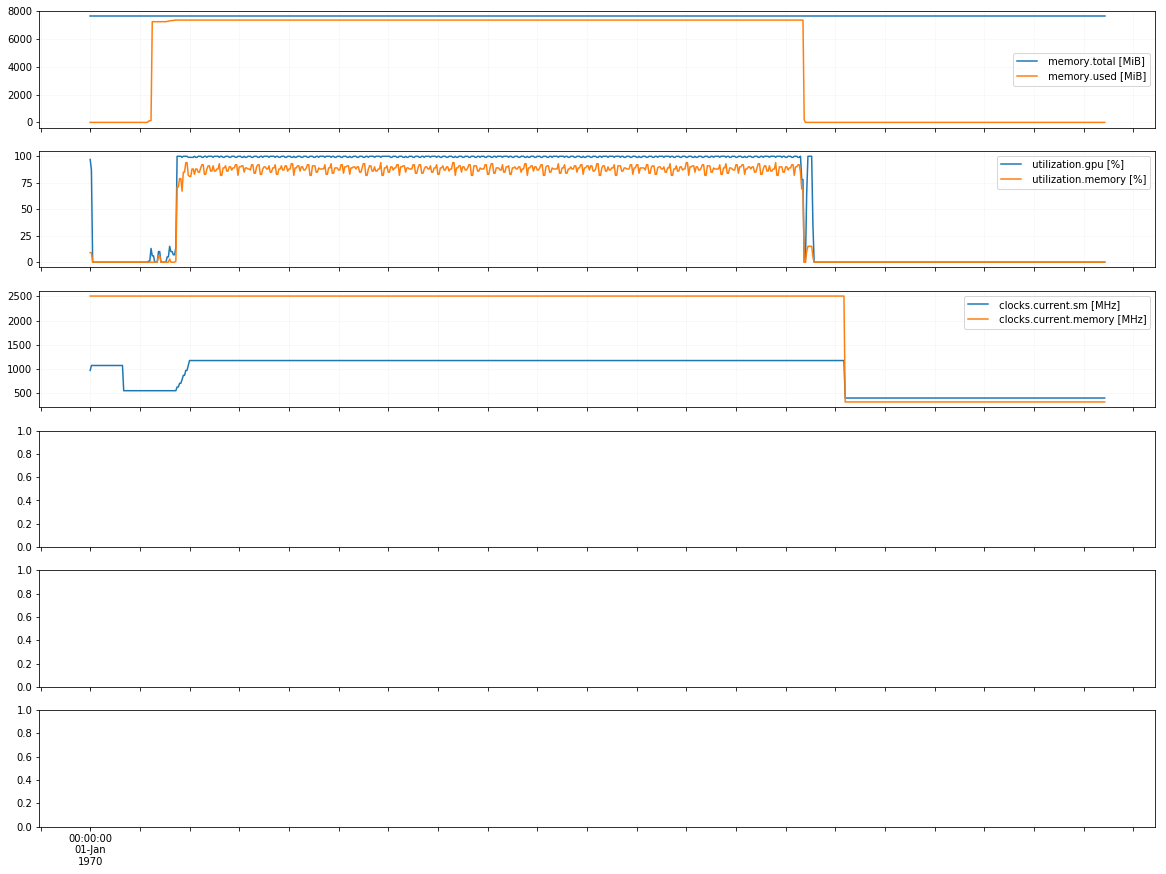

In [136]:
sub = smi_data.iloc[:,[2,3]]
fig, axarr = plt.subplots(6,sharex=True)
axis = axarr[0]
sub.plot(ax = axis)
axis.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)

sub = smi_data.iloc[:,[4,5]]
axis = axarr[1]
sub.plot(ax = axis)
axis.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)

sub = smi_data.iloc[:,[6,7]]
axis = axarr[2]
sub.plot(ax = axis)
axis.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axis.xaxis.set_major_locator(plt.MaxNLocator(24))

                                utilization.gpu [%]   utilization.memory [%]
1970-01-01 00:00:00.000000000                  97.0                      9.0
1970-01-01 00:00:00.000000001                  87.0                      9.0


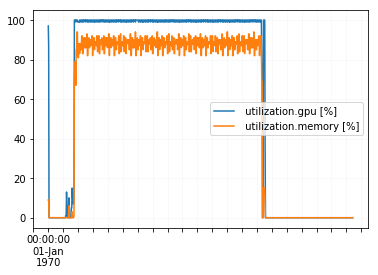

In [123]:
sub = smi_data.iloc[:,[4,5]]
print sub[:2]
sub.plot()
ax = plt.gca()
ax.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))

                                clocks.current.sm [MHz]  \
1970-01-01 00:00:00.000000000                     974.0   
1970-01-01 00:00:00.000000001                    1075.0   

                                clocks.current.memory [MHz]  
1970-01-01 00:00:00.000000000                        2505.0  
1970-01-01 00:00:00.000000001                        2505.0  


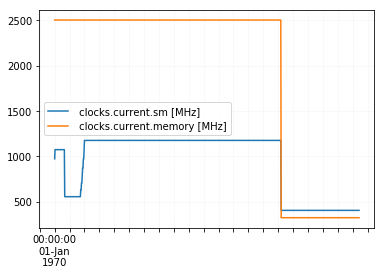

In [124]:
sub = smi_data.iloc[:,[6,7]]
print sub[:2]
sub.plot()
ax = plt.gca()
ax.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))